<a href="https://colab.research.google.com/github/Aditya02sant/OIBSIP/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris Flower Classification**

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import pickle
import os


**Upload and Load the Dataset**

In [ ]:

print("Please upload the Iris dataset (Iris.csv).")
uploaded = files.upload()


data = pd.read_csv('Iris.csv')


print("\nFirst 5 rows of the dataset:")
print(data.head())


print("\nChecking for missing values:")
print(data.isnull().sum())


Please upload the Iris dataset (Iris.csv).


Saving Iris.csv to Iris (2).csv

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Checking for missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


**Data Exploration**

In [ ]:

print("\nDataset Information:")
print(data.info())


print("\nDataset Statistics:")
print(data.describe())


print("\nUnique species in the dataset:")
print(data['Species'].unique())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Dataset Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1

**Scatter plot and Correlation heatmap**

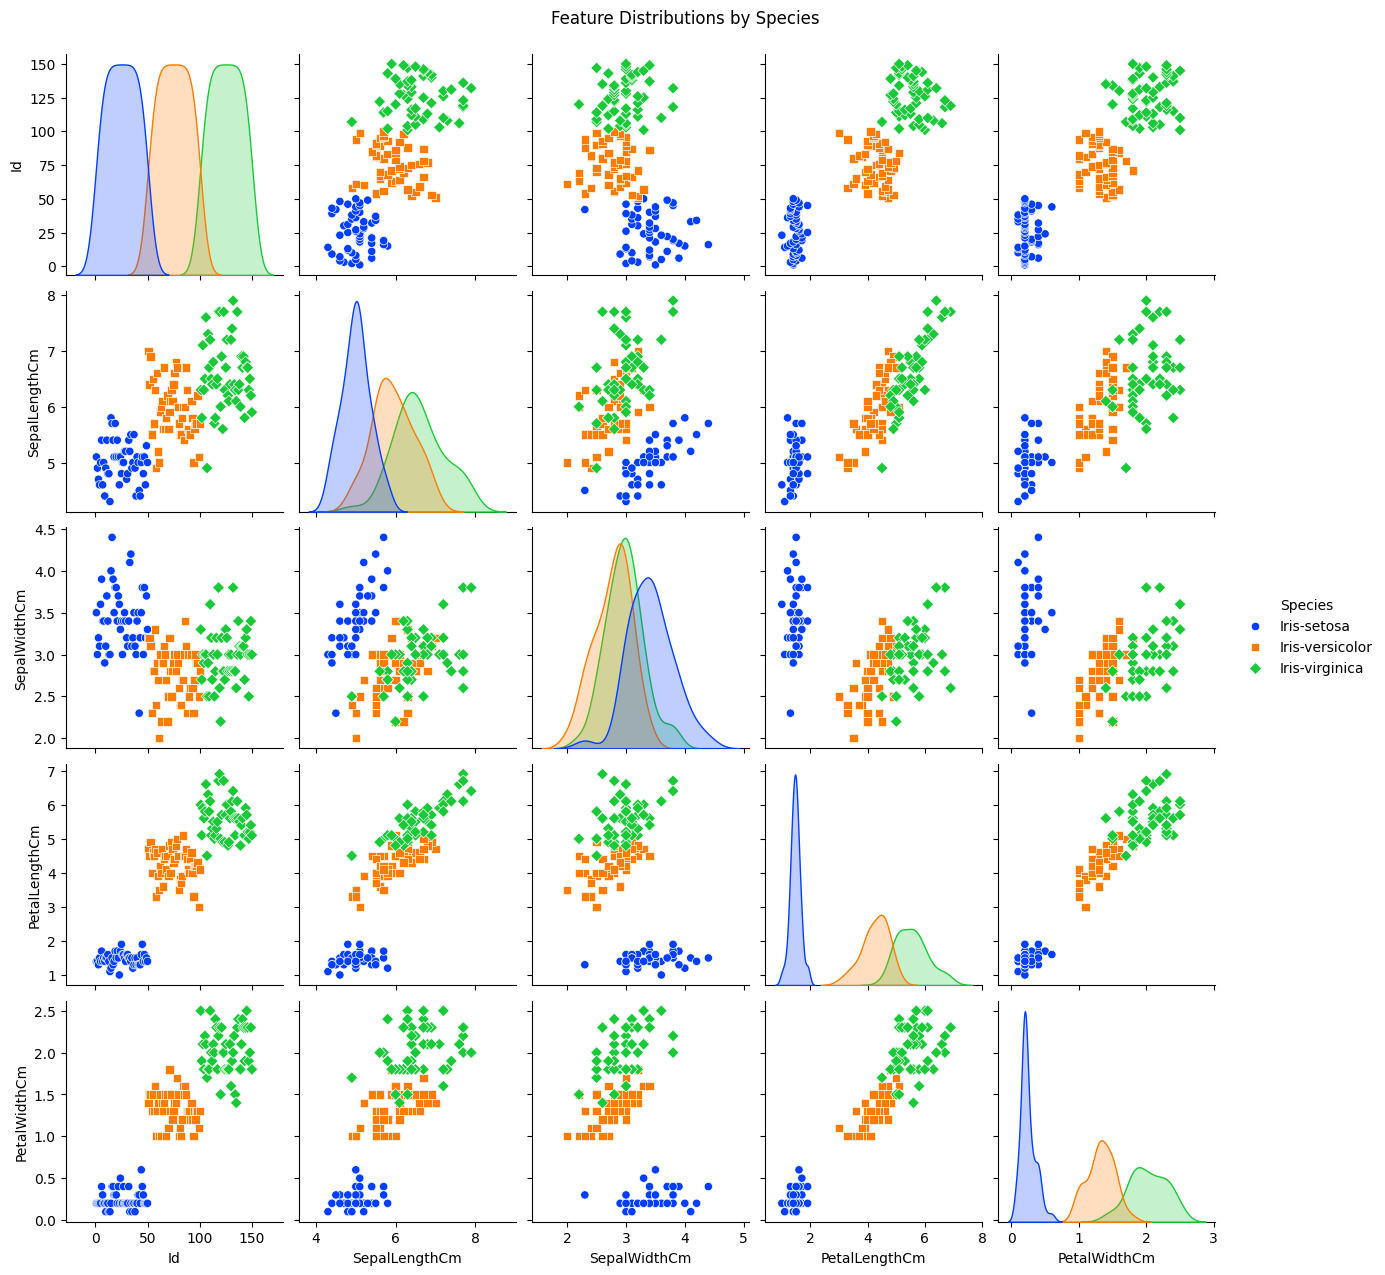

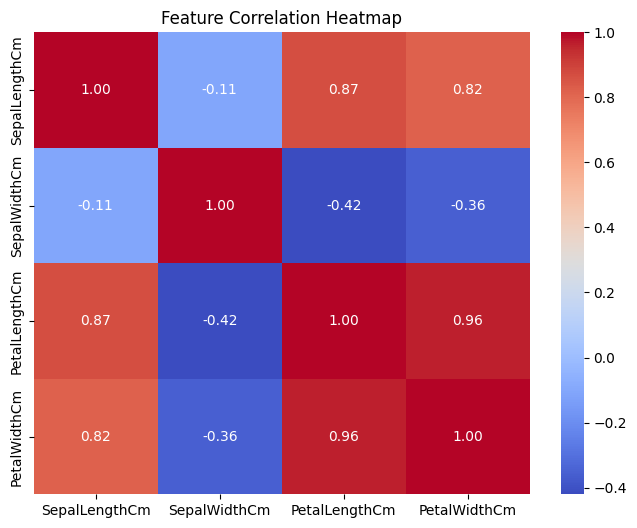

In [ ]:

sns.pairplot(data, hue="Species", markers=["o", "s", "D"], diag_kind="kde", palette="bright")
plt.suptitle("Feature Distributions by Species", y=1.02)
plt.show()


correlation = data.iloc[:, 1:-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**Data Preprocessing**

In [ ]:
# Separate features (X) and target variable (y)
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

print("Data preprocessing completed successfully.")



Data preprocessing completed successfully.


**Train Machine Learning Models**

In [ ]:

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("Models trained successfully.")



Models trained successfully.


**Evaluate the Models**

In [ ]:

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (120, 4)
y_train shape: (120,)


**Evaluate the Models**

In [ ]:

y_pred_svm = svm_model.predict(X_test)


y_pred_dt = dt_model.predict(X_test)


print("\nSupport Vector Machine Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


print("\nDecision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))



Support Vector Machine Results:
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Decision Tree Classifier Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Confusion Matrix**

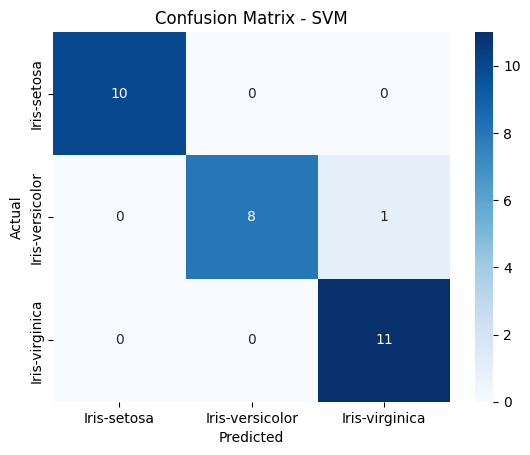

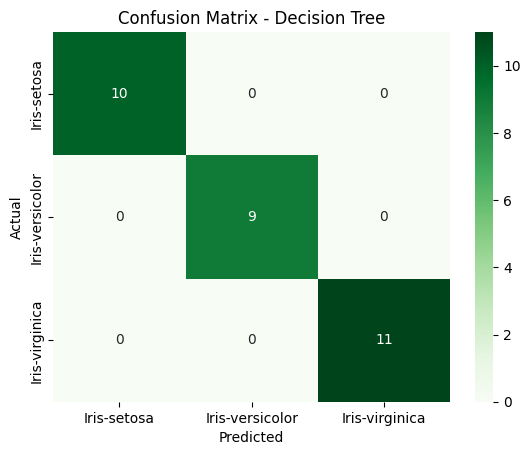

In [ ]:

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Save the Confusion matrix**

In [ ]:

plt.savefig('confusion_matrix_svm.png')
files.download('confusion_matrix_svm.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

**Test the Model with New Input Data**

In [ ]:

def predict_species(sepal_length, sepal_width, petal_length, petal_width):

    new_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])


    new_data_scaled = scaler.transform(new_data)


    svm_prediction = svm_model.predict(new_data_scaled)
    svm_species = label_encoder.inverse_transform(svm_prediction)


    dt_prediction = dt_model.predict(new_data_scaled)
    dt_species = label_encoder.inverse_transform(dt_prediction)


    print("\nPredictions for the new flower:")
    print(f"  SVM predicts: {svm_species[0]}")
    print(f"  Decision Tree predicts: {dt_species[0]}")


**Save the model**


In [ ]:
with open('iris_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

print("Model saved as 'iris_model.pkl'.")


Model saved as 'iris_model.pkl'.


**Load the Model**

In [ ]:

with open('iris_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully.")


Model loaded successfully.


**Test the Model on New Data**

In [ ]:

X_new = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])


X_new_scaled = scaler.transform(X_new)


prediction = loaded_model.predict(X_new_scaled)
species = label_encoder.inverse_transform(prediction)

print(f"The predicted species is: {species[0]}")


The predicted species is: Iris-setosa
